In [2]:
# download my census extract
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)
download("https://github.com/ryfrank/DSC530-FinalProject/raw/main/usa_00003.csv.gz")

In [3]:
# take advantage of provided code from think stats github distribution
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Downloaded thinkstats2.py
Downloaded thinkplot.py


In [4]:
# unzip file
import gzip
import shutil
if not exists("usa_00003.csv"):
    print("Extracting usa_00003.csv from usa_00003.csv.gz")
    with gzip.open("usa_00003.csv.gz", "rb") as f_in:
        with open("usa_00003.csv", "wb") as f_out:
            shutil.copyfileobj(f_in, f_out)


In [5]:
# load to data frame
import pandas
censusData = pandas.read_csv("usa_00003.csv")

In [6]:
# Test load of data frame
print(censusData.head())

   YEAR  SAMPLE  SERIAL       CBSERIAL  HHWT        CLUSTER  STRATA  GQ  \
0  2022  202201       1  2022010000031  69.0  2022000000011  280301   3   
1  2022  202201       2  2022010000111  22.0  2022000000021  200001   3   
2  2022  202201       3  2022010000200  45.0  2022000000031  280301   3   
3  2022  202201       4  2022010000261   4.0  2022000000041  110001   4   
4  2022  202201       5  2022010000296  47.0  2022000000051  150201   3   

   PERNUM  PERWT  ...  DEGFIELD2D  EMPSTAT  EMPSTATD  LABFORCE   OCC   IND  \
0       1   69.0  ...           0        3        30         1     0     0   
1       1   22.0  ...           0        3        30         1  9645  5391   
2       1   45.0  ...           0        3        30         1  8800  1180   
3       1    4.0  ...           0        3        30         1     0     0   
4       1   47.0  ...           0        3        30         1  6230   770   

   INCTOT  INCWAGE  PWSTATE2  PWCOUNTY  
0   18800        0         0         0 

Data Filters & Cleaning

As I am looking to explore education and income - I want to limit my analysis to those who are employed and have income (This is a simplication but I'm focusing on my statistical question)  I will also need to remove records where there is missing data


In [48]:
# Filter conditions
# EMPSTAT - indicates if person was part of the labor force - for my purposes I'm looking where the value is 1 for Employed
censusDataFilter = censusData[censusData["EMPSTAT"] == 1]
# INCWAGE - wage and salary income for the prior year and codes for no data available
censusDataFilter = censusDataFilter[censusDataFilter["INCWAGE"] > 0]          # no income
censusDataFilter = censusDataFilter[censusDataFilter["INCWAGE"] != 999999]      # coded N/A
censusDataFilter = censusDataFilter[censusDataFilter["INCWAGE"] != 999998]      # coded Missing
# AGE - convert to a number and change type to int
#censusDataFilter["AGENUM"] = int(censusDataFilter["AGE"])
censusDataFilter["AGE"] = censusDataFilter["AGE"].astype(int)
censusDataFilter.dropna(subset=["AGE"], inplace=True)

print(censusDataFilter.shape[0])

1489121


Variables:
NCHILD - Number of own children in household

I expect this to be a proxy for choices made that could effect income - having more children at home would indicate that career choices are made that would effect income to support that.  Filtering out the respondents that are not in the labor force changes the distribution significantly - most of the 0 children entries that are removed are likely to be those underage themselves.  Looking at the distribution I suspect modeling this as a yes/no if the person has children may be the way to go.

(array([8.87800e+05, 2.63364e+05, 2.24120e+05, 8.15260e+04, 2.35090e+04,
        5.87900e+03, 1.80600e+03, 6.37000e+02, 2.81000e+02, 1.99000e+02]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

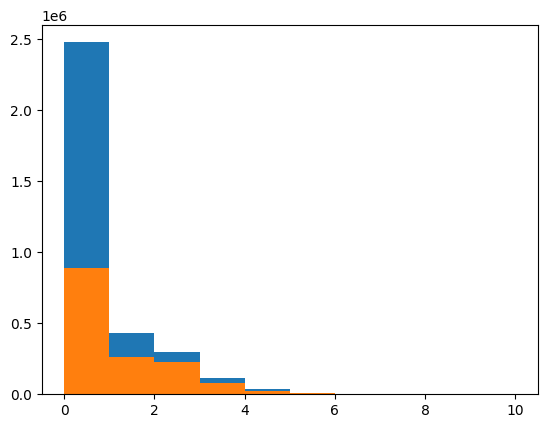

In [49]:
import matplotlib.pyplot as plt 

plt.hist(censusData["NCHILD"], bins=[0,1,2,3,4,5,6,7,8,9,10])
plt.hist(censusDataFilter["NCHILD"], bins=[0,1,2,3,4,5,6,7,8,9,10])


AGE - respondants age - likely an influence on income as generally speaking your income will increase as your career progresses

Distribution after filter makes sense - most people enter the workforce between 18-22 (depending on schooling), and then a large drop off at 65 as people retire. Distribution is fairly even in the middle, with a very short tail between ~16-22 and a long tail extending past age 65.  This can also be seen with the slope on the plotting CDF for age. 

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        8.0200e+03, 1.1953e+04, 1.8547e+04, 2.2662e+04, 2.4230e+04,
        2.5046e+04, 2.4996e+04, 2.6365e+04, 2.6701e+04, 2.7854e+04,
        2.8276e+04, 2.9048e+04, 2.9596e+04, 3.0211e+04, 3.1951e+04,
        3.1855e+04, 3.2357e+04, 3.1612e+04, 3.0898e+04, 3.1179e+04,
        3.0951e+04, 3.0763e+04, 3.0448e+04, 3.0328e+04, 3.1556e+04,
        3.0430e+04, 3.0411e+04, 2.9193e+04, 2.8697e+04, 2.8834e+04,
        2.7671e+04, 2.8249e+04, 2.8148e+04, 2.8226e+04, 3.0632e+04,
        3.2062e+04, 3.1405e+04, 3.0253e+04, 2.9179e+04, 2.9466e+04,
        2.9391e+04, 3.0475e+04, 3.0905e+04, 3.0302e+04, 2.9790e+04,
        2.8690e+04, 2.6562e+04, 2.3734e+04, 2.2118e+04, 1.8674e+04,
        1.5444e+04, 1.2927e+04, 1.1230e+04, 9.9660e+03, 8.0300e+03,
        6.8090e+03, 5.7050e+03, 4.9930e+03, 4.42

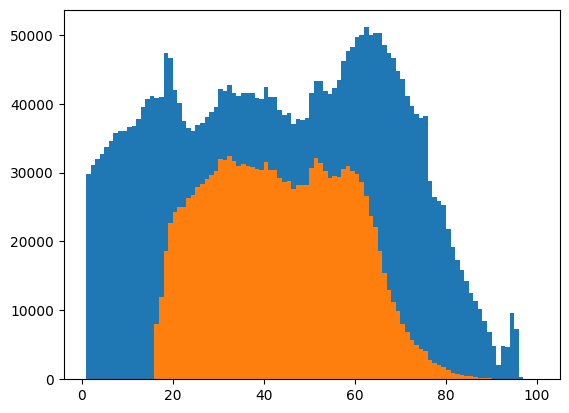

In [50]:
bins = []
for i in range(100):
    bins.append(i+1)

plt.hist(censusData["AGE"], bins=bins)
plt.hist(censusDataFilter["AGE"], bins=bins)

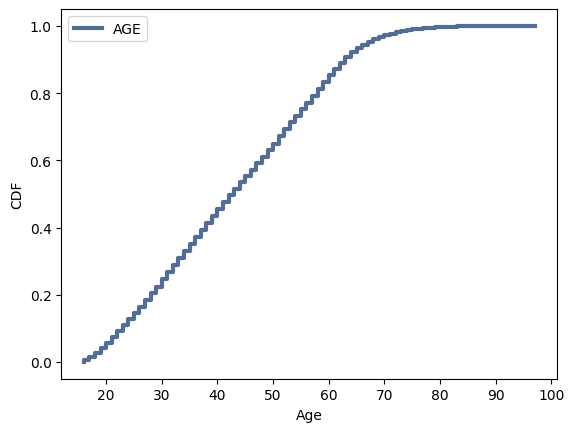

<Figure size 800x600 with 0 Axes>

In [51]:
# import the provided libraries from the github repo for the text Think Stats - as I've already been using these for the course, 
#  it makes getting and plotting the CDF easier
import thinkstats2
import thinkplot

cdf = thinkstats2.Cdf(censusDataFilter["AGE"], label="AGE")
thinkplot.Cdf(cdf)
thinkplot.show(xlabel="Age", ylabel="CDF")

INCWAGE is the wage and salary income of the respondent, pre-tax, in 2022 US Dollars (as we are only looking at the 2022 sample, I don't have to adjust other years incomes for inflation).  Income distribution shows most incomes are clustered under 100,000, with a very long tail to the right.  The CDF shows around 85-90% of all incomes are under $100,000

(array([1.39817e+05, 1.60473e+05, 1.75765e+05, 1.54741e+05, 1.31110e+05,
        1.11699e+05, 8.67810e+04, 6.83100e+04, 4.96680e+04, 5.23990e+04,
        2.56630e+04, 3.21290e+04, 1.86730e+04, 1.42930e+04, 2.00740e+04,
        9.77800e+03, 8.66100e+03, 7.88700e+03, 3.97800e+03, 1.26550e+04,
        2.74500e+03, 4.11700e+03, 2.23500e+03, 2.04300e+03, 6.16200e+03,
        1.26200e+03, 1.51900e+03, 1.18900e+03, 6.02000e+02, 4.07400e+03,
        4.16000e+02, 6.38000e+02, 3.44000e+02, 2.75000e+02, 1.21500e+03,
        5.00000e+02, 2.68000e+02, 1.88000e+02, 1.10000e+02, 1.20300e+03,
        4.89000e+02, 5.36000e+02, 4.80000e+01, 1.33000e+02, 3.99000e+02,
        2.26000e+02, 5.20000e+01, 1.64000e+03, 1.31600e+03, 4.63000e+02,
        7.61000e+02, 2.96000e+02, 2.34200e+03, 1.19400e+03, 1.00000e+00,
        4.12000e+02, 1.54000e+03, 5.65000e+02, 0.00000e+00, 0.00000e+00,
        9.69000e+02, 5.25000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.18600e+03, 0.00

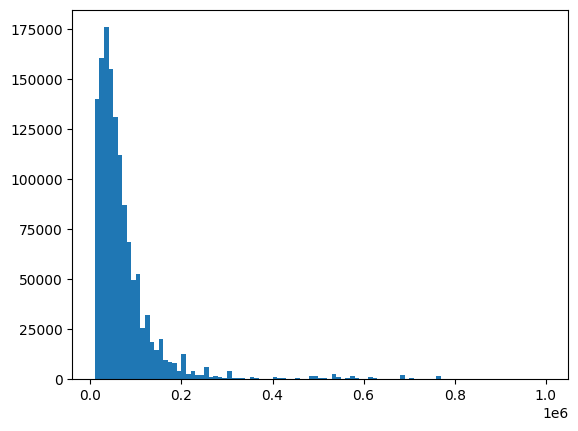

In [53]:
# create bins of 10,000$ ranges
bins = []
for i in range(100):
    bins.append((i+1)*10000)

plt.hist(censusDataFilter["INCWAGE"], bins=bins)

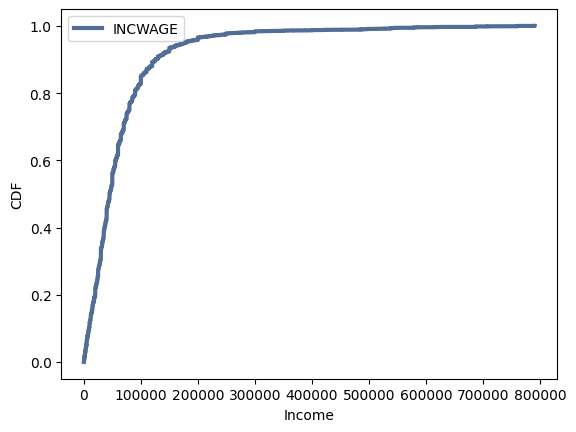

<Figure size 800x600 with 0 Axes>

In [54]:
cdf = thinkstats2.Cdf(censusDataFilter["INCWAGE"], label="INCWAGE")
thinkplot.Cdf(cdf)
thinkplot.show(xlabel="Income", ylabel="CDF")